In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch._dynamo
torch._dynamo.config.suppress_errors = True

In [36]:
class XORMLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(2, 3)
    self.lin2 = nn.Linear(3, 3)
    self.lin3 = nn.Linear(3, 2)

  def forward(self, x):
    x = torch.relu(self.lin1(x))
    x = torch.relu(self.lin2(x))
    x = self.lin3(x)
    return x

In [37]:
model = XORMLP()
model = torch.compile(model)

In [38]:
for param_name, param in model.named_parameters():
    print(param_name, param.shape)

_orig_mod.lin1.weight torch.Size([3, 2])
_orig_mod.lin1.bias torch.Size([3])
_orig_mod.lin2.weight torch.Size([3, 3])
_orig_mod.lin2.bias torch.Size([3])
_orig_mod.lin3.weight torch.Size([2, 3])
_orig_mod.lin3.bias torch.Size([2])


In [39]:
model.state_dict()

OrderedDict([('_orig_mod.lin1.weight',
              tensor([[-0.4160,  0.3642],
                      [ 0.4332, -0.3507],
                      [-0.4889, -0.0367]])),
             ('_orig_mod.lin1.bias', tensor([0.0556, 0.5697, 0.0944])),
             ('_orig_mod.lin2.weight',
              tensor([[-0.4535,  0.0482, -0.1219],
                      [ 0.3782,  0.4190,  0.5701],
                      [ 0.2873, -0.3571,  0.1687]])),
             ('_orig_mod.lin2.bias', tensor([-0.2630, -0.5020, -0.2139])),
             ('_orig_mod.lin3.weight',
              tensor([[ 0.3549,  0.0414,  0.3699],
                      [-0.2455, -0.5096, -0.0693]])),
             ('_orig_mod.lin3.bias', tensor([-0.2979, -0.0792]))])

In [52]:
y = model(torch.tensor([[-5, 6], [5, 5]], dtype=torch.float))
y

tensor([[ 0.3286, -1.4280],
        [-0.2979, -0.0792]], grad_fn=<AddmmBackward0>)

### Only for prediction

In [55]:
print(torch.distributions.categorical.Categorical(logits = y[0]).sample().item())
print(torch.distributions.categorical.Categorical(logits = y[1]).sample().item())

0
1


In [ ]:
# y = [Class1, Class2]
# y = [0, 1] => it is of Class2

In [ ]:
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr = 0.02)
batch_size = 200
print_every = 100
for epoch in range(10000):
  for i in range(0, X.shape[0], batch_size):
      x = X[i : i + batch_size]
      y = Y[i : i + batch_size]
      y_pred = model(x)
      loss = loss_fn(y_pred, y)
      # loss = loss_fn(y_pred, y) + 0.0001 * (torch.norm(model.fc1.weight, 2) + torch.norm(model.fc
      loss.backward()
      opt.step()
      opt.zero_grad()
  if epoch % print_every == 0:
    print(epoch, loss.item())

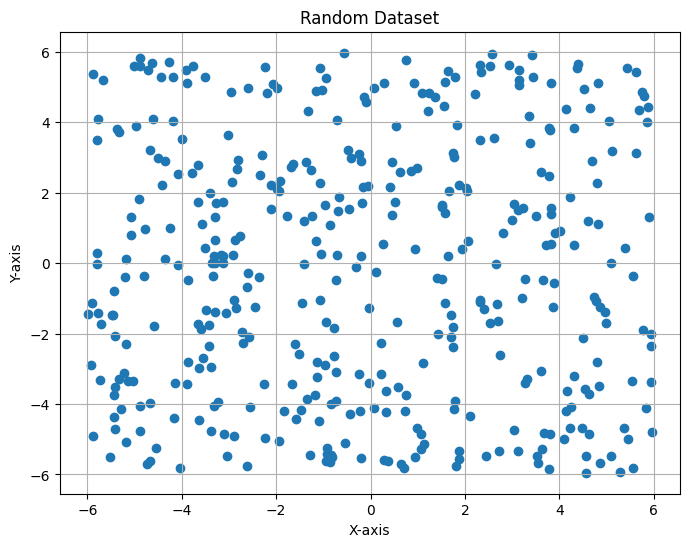

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Number of instances
num_instances = 400

# Generate random numbers for x-axis and y-axis
X = np.random.uniform(-6, 6, size=(num_instances, 1))
Y = np.random.uniform(-6, 6, size=(num_instances, 1))

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X, Y)
plt.title('Random Dataset')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


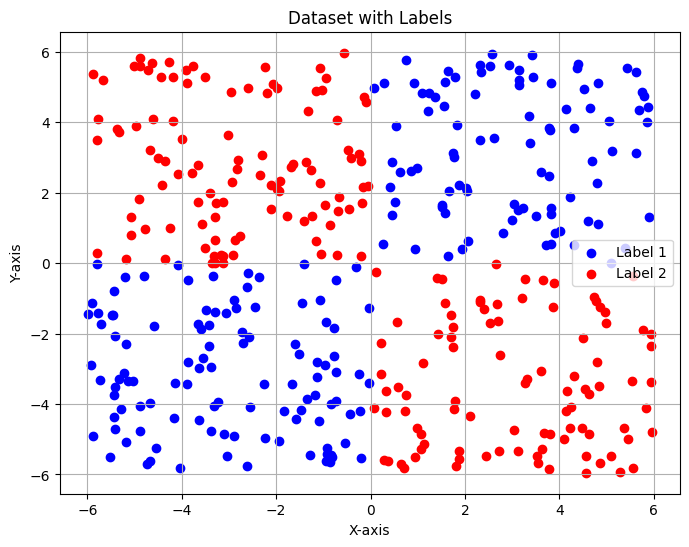

In [4]:
# Define labels based on conditions
label_1_indices = np.logical_and(X > 0, Y > 0) | np.logical_and(X < 0, Y < 0)
label_2_indices = np.logical_and(X > 0, Y < 0) | np.logical_and(X < 0, Y > 0)

# Assign labels
labels = np.zeros_like(X)
labels[label_1_indices] = 1  # Label 1
labels[label_2_indices] = 2  # Label 2

# Plot the dataset with labels
plt.figure(figsize=(8, 6))
plt.scatter(X[labels == 1], Y[labels == 1], c='blue', label='Label 1')
plt.scatter(X[labels == 2], Y[labels == 2], c='red', label='Label 2')
plt.title('Dataset with Labels')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()
